In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import datetime as dt

In [2]:
df = pd.read_csv('scanner_data.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df['tot_amt'] = df['Quantity']*df['Sales_Amount']

In [6]:
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,tot_amt
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,tot_amt
0,2016-02-01,2547,1,X52,0EM7L,1.0,3.13,3.13
1,2016-02-01,822,2,2ML,68BRQ,1.0,5.46,5.46
2,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35,6.35
3,2016-02-01,3719,4,0H2,549KK,1.0,5.59,5.59
4,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88,6.88


In [9]:
last_txn_date = df['Date'].max()

In [10]:
last_txn_date

Timestamp('2016-12-31 00:00:00')

In [11]:
last_txn = df.groupby('Customer_ID')['Date'].max()

In [12]:
last_txn

Customer_ID
1       2016-01-22
2       2016-06-19
3       2016-02-01
4       2016-11-07
5       2016-09-02
           ...    
22621   2016-10-12
22622   2016-12-16
22623   2016-12-21
22624   2016-02-12
22625   2016-12-31
Name: Date, Length: 22625, dtype: datetime64[ns]

In [13]:
last_txn = pd.to_datetime(last_txn.values)

In [14]:
last_txn

DatetimeIndex(['2016-01-22', '2016-06-19', '2016-02-01', '2016-11-07',
               '2016-09-02', '2016-03-31', '2016-05-10', '2016-06-21',
               '2016-03-20', '2016-12-02',
               ...
               '2016-10-26', '2016-12-12', '2016-11-21', '2016-04-12',
               '2016-01-11', '2016-10-12', '2016-12-16', '2016-12-21',
               '2016-02-12', '2016-12-31'],
              dtype='datetime64[ns]', length=22625, freq=None)

In [15]:
recency= (last_txn_date-last_txn).days

In [16]:
recency

Int64Index([344, 195, 334,  54, 120, 275, 235, 193, 286,  29,
            ...
             66,  19,  40, 263, 355,  80,  15,  10, 323,   0],
           dtype='int64', length=22625)

In [17]:
frq_group = df.groupby('Customer_ID')['Transaction_ID'].count()

In [18]:
frq_group

Customer_ID
1        2
2        2
3        3
4        5
5        5
        ..
22621    2
22622    1
22623    2
22624    2
22625    9
Name: Transaction_ID, Length: 22625, dtype: int64

In [19]:
paisa = df.groupby('Customer_ID')['tot_amt'].sum()

In [20]:
paisa

Customer_ID
1         16.29
2         22.77
3         19.08
4         33.29
5        248.27
          ...  
22621     17.19
22622      6.07
22623    225.87
22624     19.60
22625     89.08
Name: tot_amt, Length: 22625, dtype: float64

In [21]:
df_rfm = pd.DataFrame(list(zip(recency,frq_group,paisa)),columns=['Recency','Frequency','Monetary'])

In [22]:
df_rfm

,Recency,Frequency,Monetary
0,344,2,16.29
1,195,2,22.77
2,334,3,19.08
3,54,5,33.29
4,120,5,248.27
...,...,...,...
22620,80,2,17.19
22621,15,1,6.07
22622,10,2,225.87
22623,323,2,19.60


#### Calculating RFM score

1 - Not Good<br>
5 - Good

In [23]:
df_rfm['Recency'].describe()

count    22625.000000
mean       144.408796
std        109.263227
min          0.000000
25%         44.000000
50%        120.000000
75%        242.000000
max        364.000000
Name: Recency, dtype: float64

In [24]:
df_rfm_score = pd.DataFrame(columns=['Customer_ID','Recency','Frequency','Monetary'])

In [25]:
r_bins = [-np.Inf,0,44,120,242,np.Inf]
r_labels = ['5','4','3','2','1']
df_rfm_score.Recency = pd.cut(df_rfm['Recency'],bins=r_bins,labels=r_labels)

In [26]:
df_rfm_score.head()

,Customer_ID,Recency,Frequency,Monetary
0,NaN,1,NaN,NaN
1,NaN,2,NaN,NaN
2,NaN,1,NaN,NaN
3,NaN,3,NaN,NaN
4,NaN,3,NaN,NaN


In [27]:
df_rfm.Frequency.describe()

count    22625.000000
mean         5.821260
std          9.887028
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        228.000000
Name: Frequency, dtype: float64

In [28]:
f_bins = [-np.Inf,0,1,3,6,np.Inf]
f_labels = ['1','2','3','4','5']
df_rfm_score.Frequency = pd.cut(df_rfm.Frequency,bins=f_bins,labels=f_labels)

In [29]:
df_rfm_score.head()

,Customer_ID,Recency,Frequency,Monetary
0,NaN,1,3,NaN
1,NaN,2,3,NaN
2,NaN,1,3,NaN
3,NaN,3,4,NaN
4,NaN,3,4,NaN


In [30]:
df_rfm.Monetary.describe()

count    22625.000000
mean       122.011461
std        482.101388
min          0.140000
25%         10.810000
50%         27.260000
75%         83.080000
max      40070.491000
Name: Monetary, dtype: float64

In [31]:
m_bins = [-np.Inf,0,10,27,83,np.Inf]
m_labels = ['1','2','3','4','5']
df_rfm_score.Monetary = pd.cut(df_rfm.Monetary,bins=m_bins,labels=m_labels)

In [32]:
df_rfm_score.head()

,Customer_ID,Recency,Frequency,Monetary
0,NaN,1,3,3
1,NaN,2,3,3
2,NaN,1,3,3
3,NaN,3,4,4
4,NaN,3,4,5


In [33]:
df_rfm_score.Customer_ID = paisa.index

In [34]:
df_rfm_score.head()

,Customer_ID,Recency,Frequency,Monetary
0,1,1,3,3
1,2,2,3,3
2,3,1,3,3
3,4,3,4,4
4,5,3,4,5


In [35]:
df_rfm_score.shape

(22625, 4)

### Clustering

In [42]:
df_rfm_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22625 entries, 0 to 22624
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer_ID  22625 non-null  int64   
 1   Recency      22625 non-null  category
 2   Frequency    22625 non-null  category
 3   Monetary     22625 non-null  category
dtypes: category(3), int64(1)
memory usage: 243.8 KB


In [60]:
model = KMeans(n_clusters=1,init='random')
model.fit(df_rfm_score.drop(columns='Customer_ID'))
# dist = cdist(df_rfm_score.drop(columns='Customer_ID'),model.cluster_centers_,'euclidean')
type(model.cluster_centers_)

numpy.ndarray

In [61]:
model.cluster_centers_

array([[2.51230939, 3.36755801, 3.52154696]])

In [47]:
df_rfm_score.drop(columns='Customer_ID')

,Recency,Frequency,Monetary
0,1,3,3
1,2,3,3
2,1,3,3
3,3,4,4
4,3,4,5
...,...,...,...
22620,3,3,3
22621,4,2,2
22622,4,3,5
22623,1,3,3


In [63]:
df_rfm_score = df_rfm_score.astype({'Recency':'int','Frequency':'int','Monetary':'int'})

In [64]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i,init='random')
    model.fit(df_rfm_score.drop(columns='Customer_ID'))
    dist = cdist(df_rfm_score.drop(columns='Customer_ID'),model.cluster_centers_.tolist(),'euclidean')
    min_dist = np.min(dist,axis=1)
    avg_dist = sum(min_dist)/df_rfm_score.shape[0]
    print(avg_dist)
    wcss.append(avg_dist)

1.8330878363568561
1.29463167499579
1.0986888897385536
0.9489329157965031
0.8706529344409387
0.7911569853775214
0.7456739207434949
0.7414123941445115
0.6843251686587859
0.6734318044393856


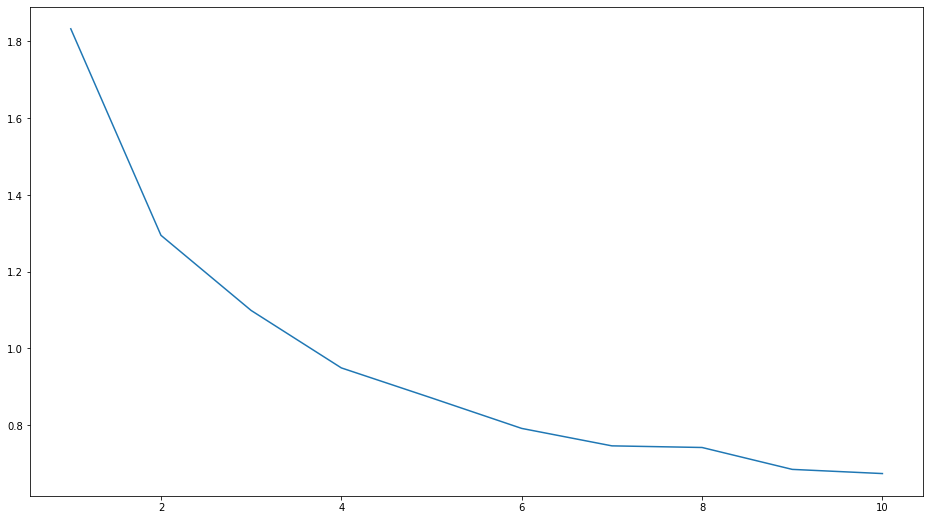

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(range(1,11),wcss)

In [37]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++')
    model.fit(df_rfm_score.drop(columns='Customer_ID'))
    # dist = cdist(df_rfm_score.drop(columns='Customer_ID'),model.cluster_centers_,'euclidean')
    # min_dist = np.min(dist,axis=1)
    # avg_dist = sum(min_dist)/df_rfm_score.shape[0]
    # print(avg_dist)
    wcss.append(model.inertia_)

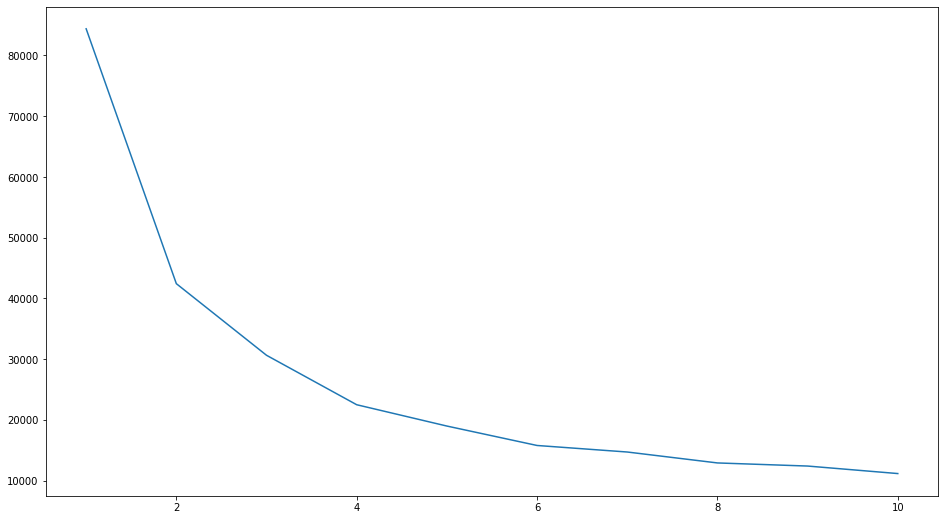

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(range(1,11),wcss`)

In [67]:
model = KMeans(n_clusters=6,init='k-means++')
model.fit(df_rfm_score.drop(columns='Customer_ID'))

KMeans(n_clusters=6)

In [68]:
p = model.fit_predict(df_rfm_score.drop(columns='Customer_ID'))

In [70]:
p

array([3, 3, 3, ..., 5, 3, 1], dtype=int32)

In [71]:
df_rfm_score['Cluster'] = model.fit_predict(df_rfm_score.drop(columns='Customer_ID'))

In [72]:
df_rfm_score.head()

,Customer_ID,Recency,Frequency,Monetary,Cluster
0,1,1,3,3,3
1,2,2,3,3,3
2,3,1,3,3,3
3,4,3,4,4,1
4,5,3,4,5,4
